 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

whale_returns_data = Path('./Resources/whale_returns.csv')
whale_returns_df = pd.read_csv(whale_returns_data, index_col='Date',parse_dates=True, infer_datetime_format=True)
whale_returns_df.head()

/var/folders/kx/wzp_9yjs5nx2vykxbvzggv980000gn/T/ipykernel_24068/2916135563.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns_df = pd.read_csv(whale_returns_data, index_col='Date',parse_dates=True, infer_datetime_format=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_data = Path('./Resources/algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_df.head()

/var/folders/kx/wzp_9yjs5nx2vykxbvzggv980000gn/T/ipykernel_24068/4119811890.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns_df = pd.read_csv(algo_returns_data, index_col='Date', parse_dates=True, infer_datetime_format=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_data = Path('./Resources/sp500_history.csv')
sp500_history_df = pd.read_csv(sp500_history_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history_df.head()

/var/folders/kx/wzp_9yjs5nx2vykxbvzggv980000gn/T/ipykernel_24068/4189721247.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_history_df = pd.read_csv(sp500_history_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
/var/folders/kx/wzp_9yjs5nx2vykxbvzggv980000gn/T/ipykernel_24068/4189721247.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_history_df = pd.read_csv(sp500_history_data, index_col='Date', parse_dates=True, infer_datetime_format=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')
sp500_history_df['Close'] = sp500_history_df['Close'].astype("float")
sp500_history_df['Close'] 

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [11]:
sp500_history_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [12]:
# Calculate Daily Returns
sp500_history_df = sp500_history_df.pct_change()
sp500_history_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls
sp500_history_df.isnull().sum()
sp500_history_df = sp500_history_df.dropna()
sp500_history_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df = sp500_history_df.rename(columns={'Close':'S&P 500'})
sp500_history_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data_cols = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis='columns', join='inner')
joined_data_cols.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

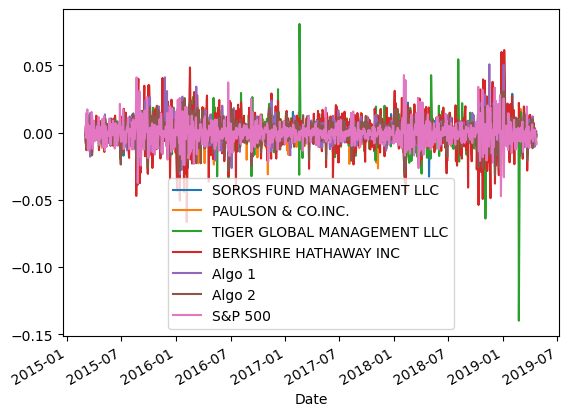

In [16]:
# Plot daily returns of all portfolios
joined_data_cols.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

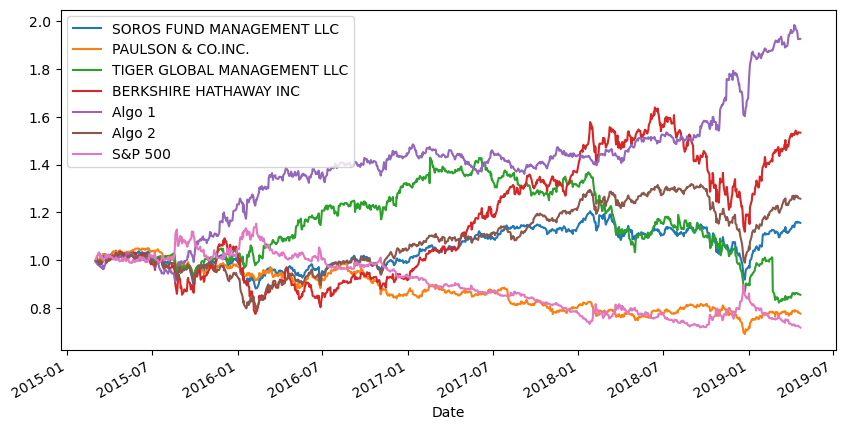

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data_cols).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

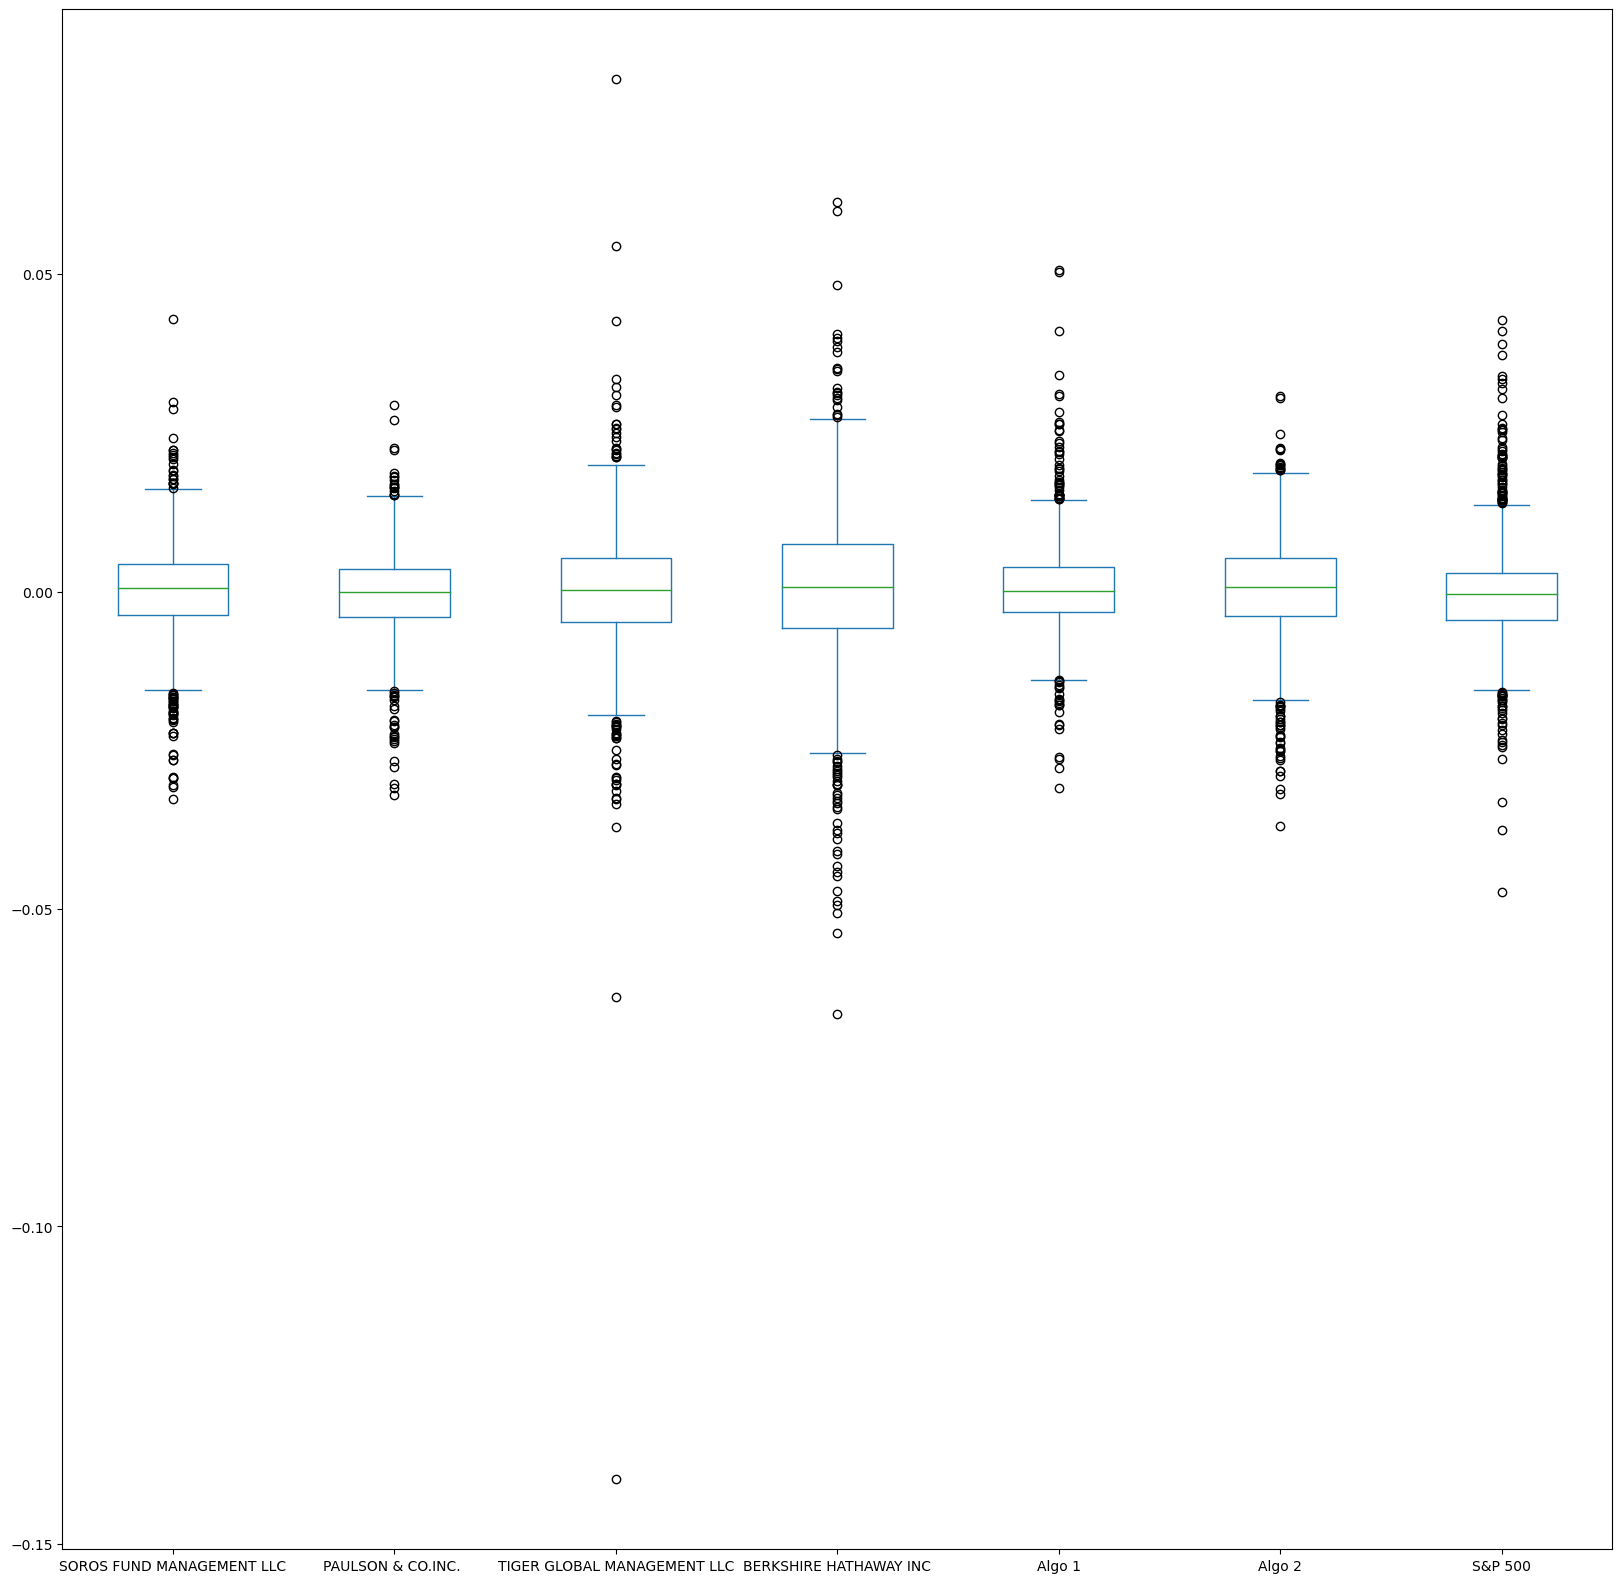

In [18]:
# Box plot to visually show risk
joined_data_cols.plot.box(figsize=(20,20))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
joined_std = joined_data_cols.std()
joined_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
sp500_history_std = sp500_history_df.std
# Determine which portfolios are riskier than the S&P 500
joined_std = joined_std.sort_values(ascending=False)
joined_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

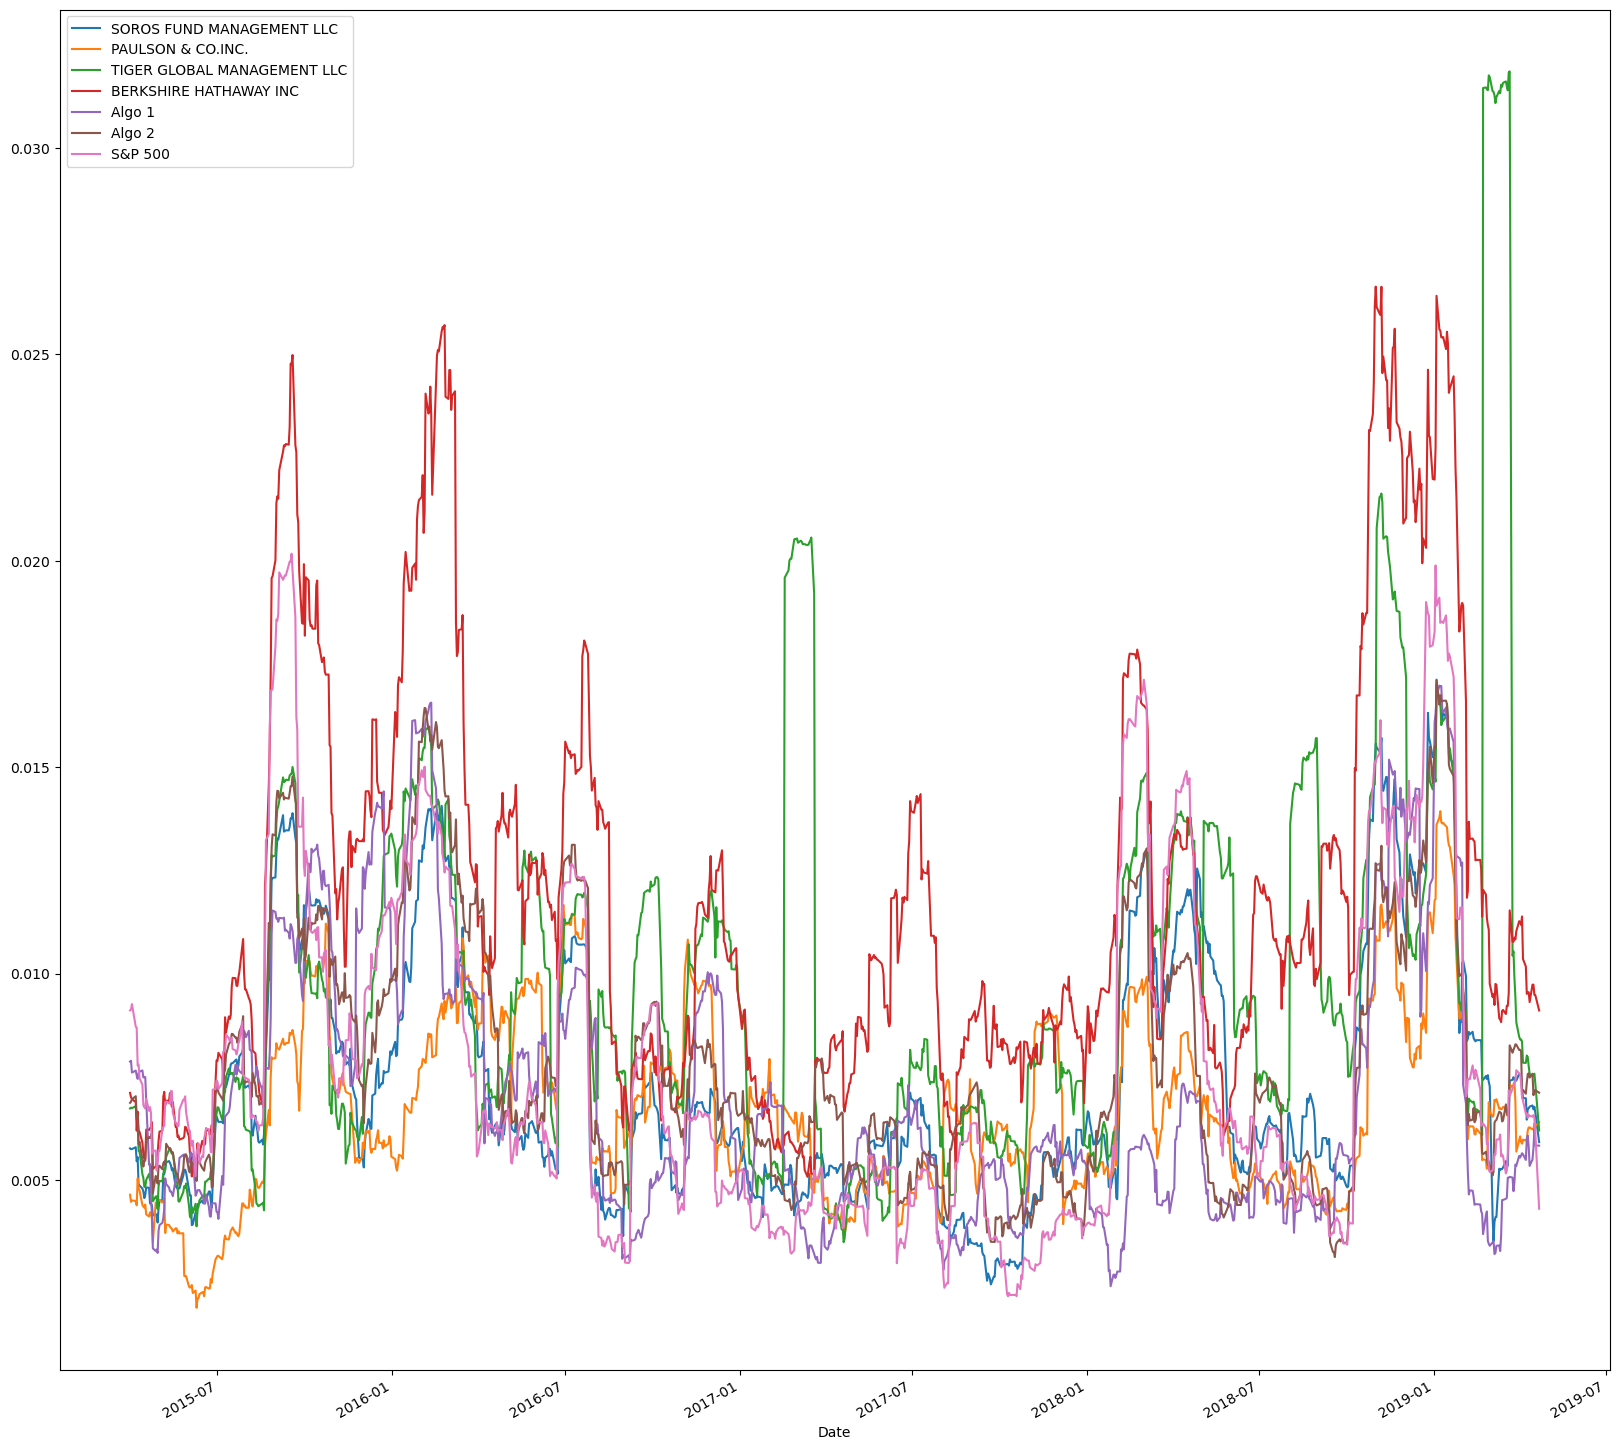

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_returns_df.rolling(window=21).std()
algo_returns_df.rolling(window=21).std()
sp500_history_df.rolling(window=21).std()
# Plot the rolling standard deviation
joined_data_cols.rolling(window=21).std().plot(figsize=(20,20))

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
whale_returns_df.corr()
algo_returns_df.corr()
sp500_history_df.corr()
# Display de correlation matrix
correlation = joined_data_cols.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

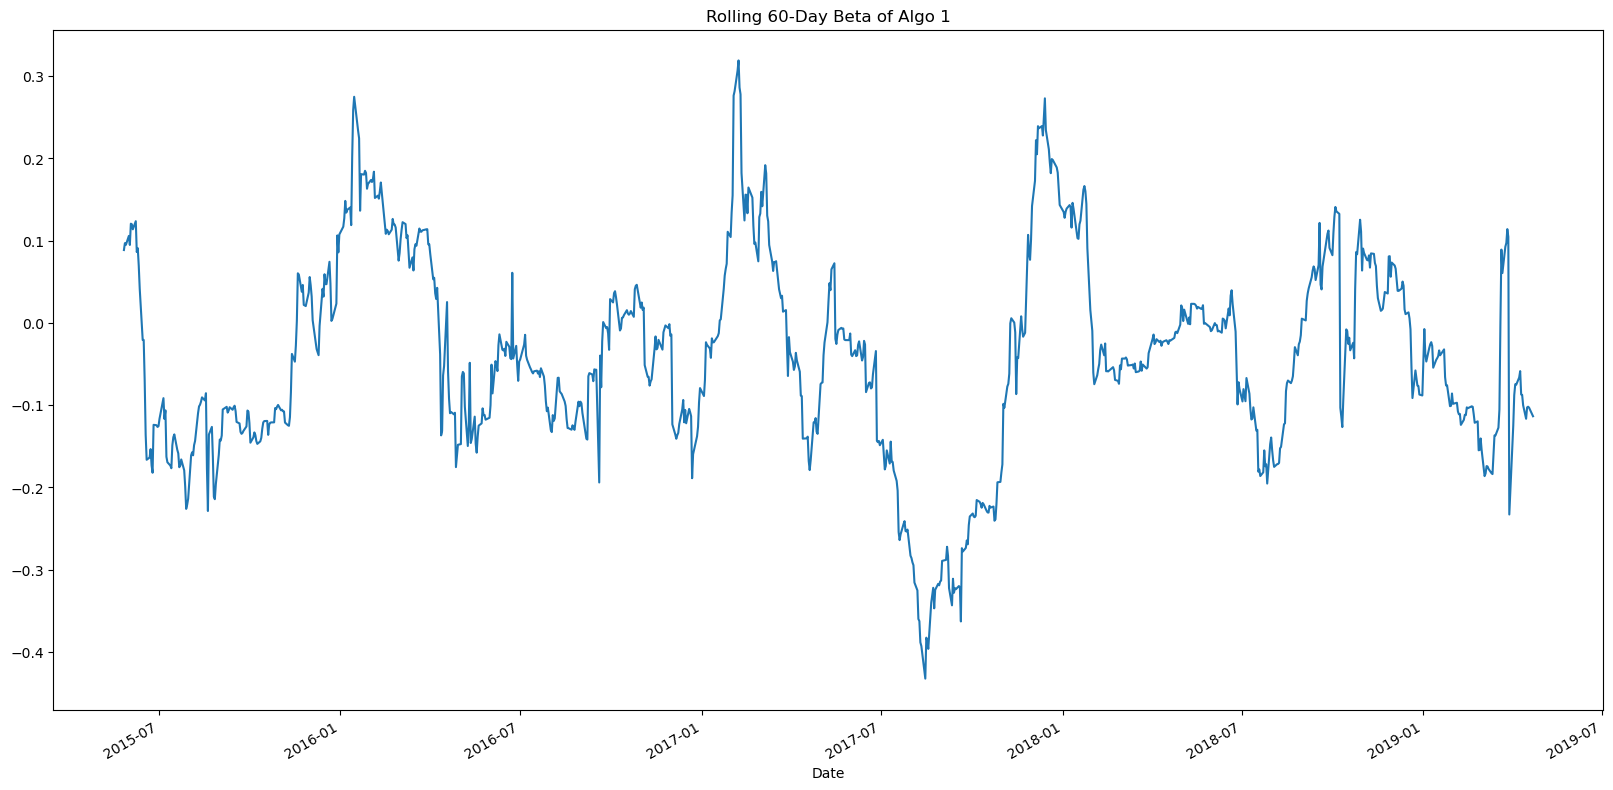

In [24]:
# Calculate covariance of a single portfolio
covariance = joined_data_cols['Algo 1'].cov(joined_data_cols['S&P 500'])

# Calculate variance of S&P 500
variance = joined_data_cols['S&P 500'].var()

# Computing beta
algo_1_beta = covariance / variance
# Plot beta trend
rolling_covariance = joined_data_cols['Algo 1'].rolling(window=60).cov(joined_data_cols['S&P 500'])
rolling_variance = joined_data_cols['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

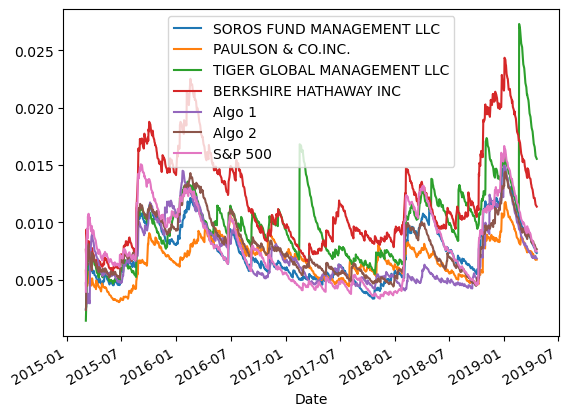

In [48]:
# Use `ewm` to calculate the rolling window
joined_data_cols.ewm(halflife=21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_data_cols.mean() * 252) / (joined_std * np.sqrt(252))
sharpe_ratios.head()

Algo 1                    1.369589
Algo 2                    0.484334
BERKSHIRE HATHAWAY INC    0.606743
PAULSON & CO.INC.        -0.491422
S&P 500                  -0.518582
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

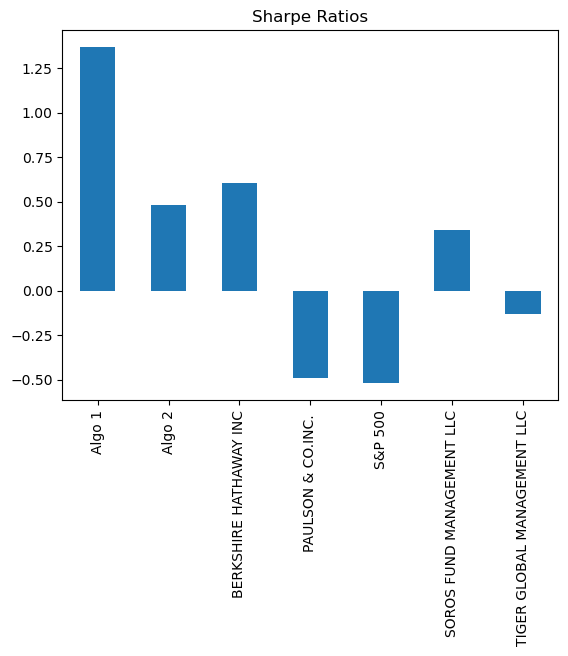

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The algorithmic strategies outperform both the market and the whales protfolios. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
AAPL_stock_data = Path('./Resources/aapl_historical.csv')
aapl_df = pd.read_csv(AAPL_stock_data, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_df.head()

/var/folders/kx/wzp_9yjs5nx2vykxbvzggv980000gn/T/ipykernel_24068/1062689447.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(AAPL_stock_data, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [29]:
#Cleaning dataframe
aapl_df.drop(columns=['Symbol'], inplace = True)
aapl_df.rename(columns={'NOCP':'AAPL'},inplace = True )
aapl_df.head()

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [30]:
# Reading data from 2nd stock
cost_stock_data = Path('./Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_stock_data, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_df.head()

/var/folders/kx/wzp_9yjs5nx2vykxbvzggv980000gn/T/ipykernel_24068/3324495863.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_df = pd.read_csv(cost_stock_data, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [31]:
#Cleaning dataframe
cost_df.drop(columns=['Symbol'], inplace = True)
cost_df.rename(columns={'NOCP':'COST'},inplace = True )
cost_df.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [32]:
# Reading data from 3rd stock
goog_stock_data = Path('./Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_stock_data, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_df.head()

/var/folders/kx/wzp_9yjs5nx2vykxbvzggv980000gn/T/ipykernel_24068/2668635936.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_df = pd.read_csv(goog_stock_data, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [33]:
#Cleaning dataframe
goog_df.drop(columns=['Symbol'], inplace = True)
goog_df.rename(columns={'NOCP':'GOOG'},inplace = True )
goog_df.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [34]:
# Combine all stocks in a single DataFrame
my_portfolio_df = pd.concat([aapl_df, cost_df, goog_df], axis='columns', join='inner')
my_portfolio_df.head()                    

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [35]:
# Reset Date index
my_portfolio_df.sort_index(inplace=True)
my_portfolio_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [36]:
# Reorganize portfolio data by having a column per symbol
my_portfolio_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [37]:
# Calculate daily returns
my_portfolio_returns = my_portfolio_df.pct_change()
# Drop NAs
my_portfolio_returns = my_portfolio_returns.dropna()
# Display sample data
my_portfolio_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_portfolio_returns = my_portfolio_returns.dot(weights)
# Display sample data
my_portfolio = pd.DataFrame(weighted_portfolio_returns)
my_portfolio.head()

,0
Trade DATE,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio_df = pd.concat([joined_data_cols, my_portfolio], axis='columns', join='inner')
combined_portfolio_df.rename(columns= {0: "My Portfolio"},inplace = True )
combined_portfolio_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio_df = combined_portfolio_df.dropna()
combined_portfolio_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
my_portfolio_returns_std = my_portfolio_returns.std()
my_portfolio_returns_annualized_std = my_portfolio_returns_std * np.sqrt(252)
my_portfolio_returns_annualized_std.head()

AAPL    0.296955
COST    0.209320
GOOG    0.263554
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Trade DATE'>

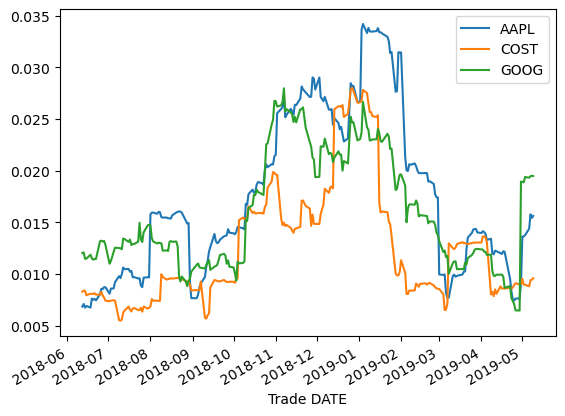

In [42]:
# Calculate rolling standard deviation
my_portfolio_returns.rolling(window=21).std()
# Plot rolling standard deviation
my_portfolio_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

<Axes: >

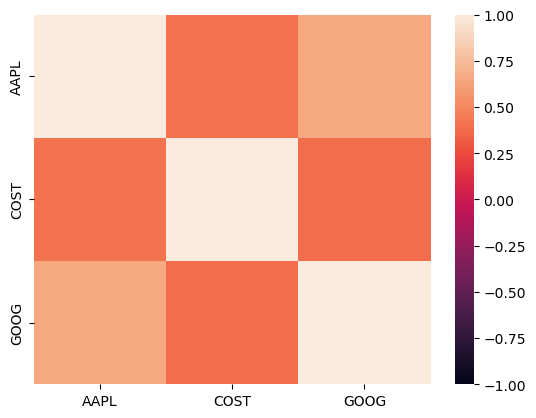

In [43]:
# Calculate and plot the correlation
my_portfolio_correlation = my_portfolio_returns.corr()

sns.heatmap(my_portfolio_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of My Portfolio'}>

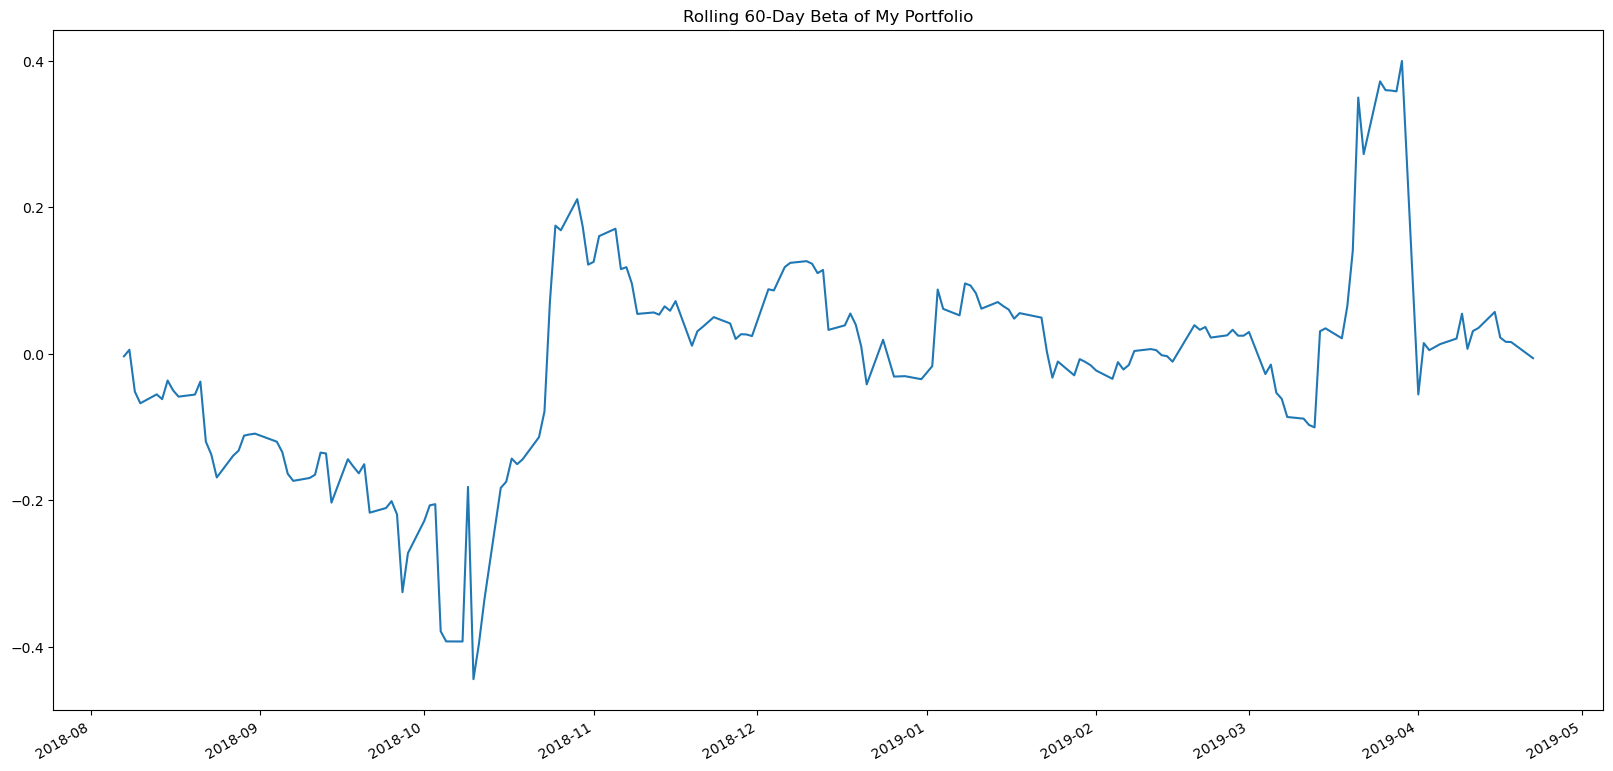

In [44]:
# Calculate and plot Beta
covariance_1 = combined_portfolio_df['My Portfolio'].cov(combined_portfolio_df['S&P 500'])
variance_1 = combined_portfolio_df['S&P 500'].var()
my_portfolio_beta = covariance_1 / variance_1
rolling_covariance_1 = combined_portfolio_df['My Portfolio'].rolling(window=60).cov(combined_portfolio_df['S&P 500'])
rolling_variance_1 = combined_portfolio_df['S&P 500'].rolling(window=60).var()
rolling_beta_1 = rolling_covariance_1 / rolling_variance_1
rolling_beta_1.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios
combined_portfolio_df_std = combined_portfolio_df.std()
sharpe_ratios_1 = (combined_portfolio_df.mean() * 252) / (combined_portfolio_df_std * np.sqrt(252))
sharpe_ratios_1.head()

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

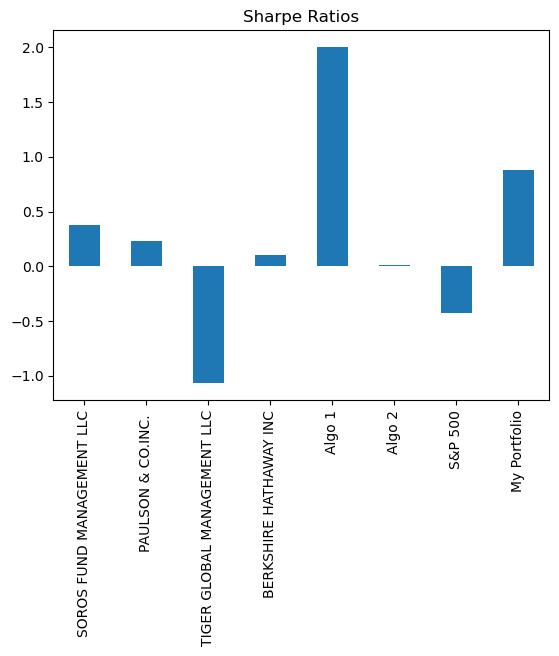

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_1.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

My portfolio did better than the market, but not better than the Algo 1 portfolio.